In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


### 哈夫曼编码

In [13]:
import queue

'''找出数据中最小的元素'''
def get2smallest(data):
    first = second = 1
    fid = sid =0 
    for idx, element in enumerate(data):
        if(element < first):
            second = first
            sid = fid 
            first = element
            fid = idx
        elif(element<second and element != first):
            second = element
    
    return fid, first, sid, second

'''定义哈夫曼节点'''
class Node:
    def __init__(self):
        self.prob = None
        self.code = None
        self.data = None
        self.left = None
        self.right = None    #元素值存储在叶节点
    
    def __lt__(self,other):
        if (self.prob < other.prob):  #定义优先树中排序规则
            return 1
        else:
            return 0
    
    def __ge__(self,other):
        if (self.prob > other.prob):
            return 1
        else:
            return 0

'''构建哈夫曼树'''
def tree(probabilities):
    prq = queue.PriorityQueue()    #优先级队列的构造函数
    for color,probability in enumerate(probabilities):
        leaf = Node()
        leaf.data = color
        leaf.prob = probability
        prq.put(leaf)
    while (prq.qsize() > 1):
        newnode = Node()   #创建新节点
        l = prq.get()
        r = prq.get()        #取出最小的两个节点
        #移除最小的两个节点
        newnode.left = l     #左侧节点较小
        newnode.right = r
        newprob = l.prob + r.prob   #新节点的概率，为左右概率之和
        newnode.prob = newprob
        prq.put(newnode)    #插入新节点，代替原有节点
    return prq.get()     #返回根节点，完成树的创建

'''对哈夫曼树遍历，得到编码'''
def huffman_traversal(root_node, tmp_array, f):
    if(root_node.left is not None):
        tmp_array[huffman_traversal.count] = 1
        huffman_traversal.count += 1
        huffman_traversal(root_node.left , tmp_array ,f)
        huffman_traversal.count -= 1
    
    if(root_node.right is not None):
        tmp_array[huffman_traversal.count] = 0
        huffman_traversal.count += 1
        huffman_traversal(root_node.right , tmp_array ,f)
        huffman_traversal.count -= 1

    else:
        huffman_traversal.output_bits[root_node.data] = huffman_traversal.count  #得到每个元素的编码值
        bitstream = ''.join(str(cell) for cell in tmp_array[1:huffman_traversal.count])
        color = str(root_node.data)
        wr_str = color + ' ' + bitstream + '\n'
        print(wr_str)
        f.write(wr_str)    #保存到文件中
    return

In [14]:
'''定义需要编码的图像'''
image = np.array([
    [3,1,2,4],
    [2,4,0,2],
    [2,2,3,3],
    [2,4,4,2]
    ])

'''计算每种元素出现的概率'''
hist = np.bincount(image.ravel(),minlength=5)
probabilities = hist / np.sum(hist)

root_node = tree(probabilities)
tmp_array = np.ones([4],dtype= int)
huffman_traversal.output_bits = np.empty(5,dtype=int)
huffman_traversal.count = 0
f = open(r'D:\PyL\DIP\notebook\chapter8\huffmancodes.txt','w')
huffman_traversal(root_node,tmp_array,f)    #遍历树结构，给出编码

2 

4 1

0 011

1 010

3 00



### LZW编码

In [15]:
string = 'abbababac'

#将编译表初始化为包含所有可能单字字符，当前前缀P初始化为空
dictionary = {'a':1,'b':2,'c':3}  
last = 4
p = ''  #prefix
result = []
for c in string:    #当前字符C:=字符流中的下一个字符
    pc = p+c
    #判断p+c是否存在编译表中
    if pc in dictionary:     # 若存在，则用C扩展P,即P:=P+C
        p = pc

    else:          #若不存在，则输出当前前缀P对应的码字，并将P+C添加回编译表中，并令P:=C
        result.append(dictionary[p])
        dictionary[pc] = last
        last += 1
        p = c
#没有码字要译，则将代表当前前缀P的码字输出到码字流，结束
if p != '':
    result.append(dictionary[p])
print('\'{0}\'的LZW编码为{1}'.format(string,result))

'abbababac'的LZW编码为[1, 2, 2, 4, 7, 3]


### 离散余弦变换

In [16]:
def set_chinese():     #maplotlib中文支持函数
    from pylab import mpl
    mpl.rcParams['font.sans-serif']=['SimHei']
    mpl.rcParams['axes.unicode_minus']=False

set_chinese()

In [17]:
img=cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\rose479by512.tif",0)# 读取图像变为灰度图像
img1=img.astype('float32')#转换为float32类型

In [18]:
#进行离散余弦变换
img_dct=cv2.dct(img1)
#进行对数处理
img_dct_log=np.log(abs(img_dct))

#进行离散余弦反变换
img_recor=cv2.idct(img_dct)
#print(img_recor)
print(img_dct.shape)
zip_len=90
#图片压缩，只保留90*90的数据,就是图片的shape变为90*90
recor_temp=img_dct[0:zip_len,0:zip_len]
print(recor_temp.shape)
#建立一个143*93的0数组
recor_temp2=np.zeros(img.shape)
#将压缩后的离散余弦变换图覆盖0数组，也就是将压缩图像恢复为原来图像大小，其余填充为0
recor_temp2[0:zip_len,0:zip_len]=recor_temp
#print(recor_temp2)
recor_temp2_float=recor_temp2.astype('float32')
img_recor_recor=cv2.idct(recor_temp2_float)

(479, 512)
(90, 90)


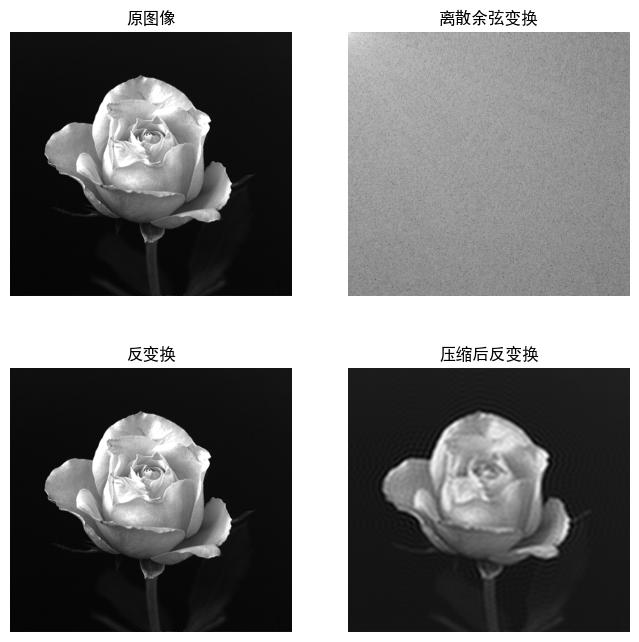

In [19]:
# 显示
plt.figure(figsize=(8,8))
plt.subplot(221),plt.imshow(img,'gray'),plt.title('原图像'),plt.axis('off')
plt.subplot(222),plt.imshow(img_dct_log,'gray'),plt.title("离散余弦变换"),plt.axis('off')
plt.subplot(223),plt.imshow(img_recor,'gray'),plt.title("反变换"),plt.axis('off')
plt.subplot(224),plt.imshow(img_recor_recor,'gray'),plt.title("压缩后反变换"),plt.axis('off')
plt.show()